In [242]:
# Transaction Probability Prediction with Logistic Regression model
# Author: Eddy Pandzic

import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression


df = pd.read_excel("2019-2022_Transaction_DataT.xlsx")

df["Amount_abs"] = abs(df.Amount)
df = df.drop(["Description", "Miscellaneous"], axis=1)
df



,Month,Year,Amount,Gas,Food,Clothing,Entertainment,Investment,Car_Maintenance,Deposit,Type,Amount_abs
0,January,"""2019""",1000.00,False,False,False,False,False,False,True,Deposit,1000.00
1,January,"""2019""",350.00,False,False,False,False,False,False,True,Deposit,350.00
2,February,"""2019""",500.00,False,False,False,False,False,False,True,Deposit,500.00
3,March,"""2019""",1000.00,False,False,False,False,False,False,True,Deposit,1000.00
4,April,"""2019""",2000.00,False,False,False,False,False,False,True,Deposit,2000.00
...,...,...,...,...,...,...,...,...,...,...,...,...
294,March,"""2022""",-14.28,True,False,False,False,False,False,False,Gas,14.28
295,March,"""2022""",-89.37,True,False,False,False,False,False,False,Gas,89.37
296,February,"""2022""",-75.00,True,False,False,False,False,False,False,Gas,75.00
297,January,"""2022""",-78.00,True,False,False,False,False,False,False,Gas,78.00


In [243]:
# Covert excel's True and False values for binary 0 and 1 for use in statistical inferences and mathematical purposes
# This method is chosen over df["column"] = df["column"].map() since it will return "NaN" as the True and False values stem from an Excel function 
df["Gas"] = df["Gas"].astype("category") # Set the column as a category
df["Food"] = df["Food"].astype("category")
df["Clothing"] = df["Clothing"].astype("category")
df["Entertainment"] = df["Entertainment"].astype("category")
df["Investment"] = df["Investment"].astype("category")
df["Car_Maintenance"] = df["Car_Maintenance"].astype("category")
df["Deposit"] = df["Deposit"].astype("category")
new_categories = [0, 1] # Category map, False = 0; True = 1
df["Gas"] = df["Gas"].cat.rename_categories(new_categories)
df["Food"] = df["Food"].cat.rename_categories(new_categories)
df["Clothing"] = df["Clothing"].cat.rename_categories(new_categories)
df["Entertainment"] = df["Entertainment"].cat.rename_categories(new_categories)
df["Investment"] = df["Investment"].cat.rename_categories(new_categories)
df["Car_Maintenance"] = df["Car_Maintenance"].cat.rename_categories(new_categories)
df["Deposit"] = df["Deposit"].cat.rename_categories(new_categories)


# Converting columns from categories into integers for use in the logistic regression model
df["Gas"] = df.Gas.astype(int)
df["Food"] = df.Food.astype(int)
df["Clothing"] = df.Clothing.astype(int)
df["Entertainment"] = df.Entertainment.astype(int)
df["Car_Maintenance"] = df.Car_Maintenance.astype(int)
df["Investment"] = df.Investment.astype(int)
df["Deposit"] = df.Deposit.astype(int)
df


,Month,Year,Amount,Gas,Food,Clothing,Entertainment,Investment,Car_Maintenance,Deposit,Type,Amount_abs
0,January,"""2019""",1000.00,0,0,0,0,0,0,1,Deposit,1000.00
1,January,"""2019""",350.00,0,0,0,0,0,0,1,Deposit,350.00
2,February,"""2019""",500.00,0,0,0,0,0,0,1,Deposit,500.00
3,March,"""2019""",1000.00,0,0,0,0,0,0,1,Deposit,1000.00
4,April,"""2019""",2000.00,0,0,0,0,0,0,1,Deposit,2000.00
...,...,...,...,...,...,...,...,...,...,...,...,...
294,March,"""2022""",-14.28,1,0,0,0,0,0,0,Gas,14.28
295,March,"""2022""",-89.37,1,0,0,0,0,0,0,Gas,89.37
296,February,"""2022""",-75.00,1,0,0,0,0,0,0,Gas,75.00
297,January,"""2022""",-78.00,1,0,0,0,0,0,0,Gas,78.00


In [244]:
# Printing summary statistics
df.describe()

,Amount,Gas,Food,Clothing,Entertainment,Investment,Car_Maintenance,Deposit,Amount_abs
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,22.647057,0.214047,0.408027,0.036789,0.063545,0.013378,0.046823,0.224080,250.262709
std,719.681611,0.410847,0.492292,0.188560,0.244350,0.115079,0.211613,0.417674,674.992322
min,-7000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.890000
25%,-52.245000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.915000
50%,-22.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.460000
75%,-2.990000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,212.405000
max,2000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7000.000000


In [245]:
# Finding correlations of all variables 
print(df.corr(numeric_only= True))

                   Amount       Gas      Food  Clothing  Entertainment  \
Amount           1.000000 -0.061969 -0.067900 -0.049123      -0.070868   
Gas             -0.061969  1.000000 -0.433261 -0.101990      -0.135942   
Food            -0.067900 -0.433261  1.000000 -0.162253      -0.216267   
Clothing        -0.049123 -0.101990 -0.162253  1.000000      -0.050909   
Entertainment   -0.070868 -0.135942 -0.216267 -0.050909       1.000000   
Investment      -0.814027 -0.060768 -0.096675 -0.022757      -0.030333   
Car_Maintenance -0.015797 -0.115664 -0.184007 -0.043315      -0.057735   
Deposit          0.438537 -0.280446 -0.429836 -0.105025      -0.107108   
Amount_abs      -0.587097 -0.145279 -0.262827 -0.026774      -0.024201   

                 Investment  Car_Maintenance   Deposit  Amount_abs  
Amount            -0.814027        -0.015797  0.438537   -0.587097  
Gas               -0.060768        -0.115664 -0.280446   -0.145279  
Food              -0.096675        -0.184007 -0.4298

Text(0.5, 1.0, 'Expenditure Prediction for Gas')

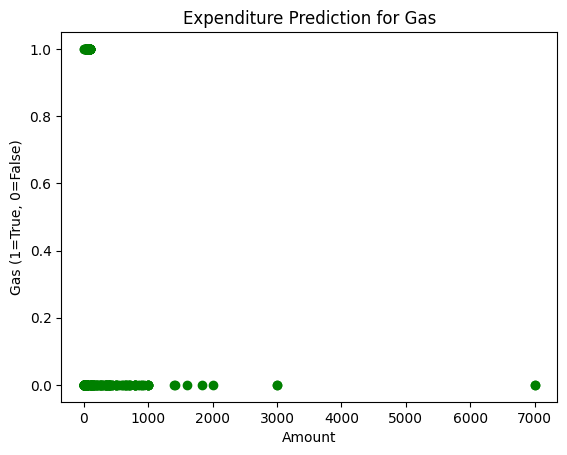

In [246]:
# Drawing Scatter plot for gas
plt.scatter(df.Amount_abs, df.Gas, color="Green")
plt.xlabel("Amount")
plt.ylabel("Gas (1=True, 0=False)")
plt.title("Expenditure Prediction for Gas")

In [247]:
# Fitting and initializing the logistical regression model for "gas"
x = df.Amount_abs
y = df.Gas
logreg = LogisticRegression(C=1.0, solver="lbfgs", multi_class="ovr")
X = x.values.reshape(-1, 1)
logreg.fit(X, y)

i = 10

while i <= 200:
    print("Predictions for $", i, ":", logreg.predict([[i]]))
    i += 10

Predictions for $ 10 : [0]
Predictions for $ 20 : [0]
Predictions for $ 30 : [0]
Predictions for $ 40 : [0]
Predictions for $ 50 : [0]
Predictions for $ 60 : [0]
Predictions for $ 70 : [0]
Predictions for $ 80 : [0]
Predictions for $ 90 : [0]
Predictions for $ 100 : [0]
Predictions for $ 110 : [0]
Predictions for $ 120 : [0]
Predictions for $ 130 : [0]
Predictions for $ 140 : [0]
Predictions for $ 150 : [0]
Predictions for $ 160 : [0]
Predictions for $ 170 : [0]
Predictions for $ 180 : [0]
Predictions for $ 190 : [0]
Predictions for $ 200 : [0]


In [248]:
# Combine Gas, Food, and Car_Maintenance into Necessary Spending; Clothing, Miscellaneous, Entertainment into Discretionary Spending; Investment and Deposit
df = df.assign(NecessarySpending = df.Gas + df.Food + df.Car_Maintenance)
df = df.assign(DiscretionarySpending = df.Clothing + df.Entertainment)
df = df.assign(InvestmentDeposit = df.Investment + df.Deposit)
df

,Month,Year,Amount,Gas,Food,Clothing,Entertainment,Investment,Car_Maintenance,Deposit,Type,Amount_abs,NecessarySpending,DiscretionarySpending,InvestmentDeposit
0,January,"""2019""",1000.00,0,0,0,0,0,0,1,Deposit,1000.00,0,0,1
1,January,"""2019""",350.00,0,0,0,0,0,0,1,Deposit,350.00,0,0,1
2,February,"""2019""",500.00,0,0,0,0,0,0,1,Deposit,500.00,0,0,1
3,March,"""2019""",1000.00,0,0,0,0,0,0,1,Deposit,1000.00,0,0,1
4,April,"""2019""",2000.00,0,0,0,0,0,0,1,Deposit,2000.00,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,March,"""2022""",-14.28,1,0,0,0,0,0,0,Gas,14.28,1,0,0
295,March,"""2022""",-89.37,1,0,0,0,0,0,0,Gas,89.37,1,0,0
296,February,"""2022""",-75.00,1,0,0,0,0,0,0,Gas,75.00,1,0,0
297,January,"""2022""",-78.00,1,0,0,0,0,0,0,Gas,78.00,1,0,0


Text(0.5, 1.0, 'Transaction Prediction for Necessary Spending')

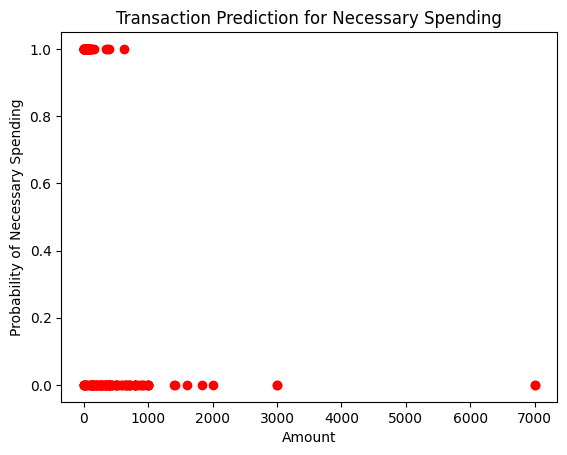

In [249]:
# Drawing Scatter plot for Necessary Spending
plt.scatter(df.Amount_abs, df.NecessarySpending, color="Red")
plt.xlabel("Amount")
plt.ylabel("Probability of Necessary Spending")
plt.title("Transaction Prediction for Necessary Spending")

In [250]:
# Fitting and initializing the logistical regression model for Necessary Spending
x = df.Amount_abs
y2 = df.NecessarySpending
logreg = LogisticRegression(C=1.0, solver="lbfgs", multi_class="ovr")
X = x.values.reshape(-1, 1)
logreg.fit(X, y2)

i = 10

while i <= 200:
    print("Predictions for $", i, ":", logreg.predict([[i]]))
    i += 10

Predictions for $ 10 : [1]
Predictions for $ 20 : [1]
Predictions for $ 30 : [1]
Predictions for $ 40 : [1]
Predictions for $ 50 : [1]
Predictions for $ 60 : [1]
Predictions for $ 70 : [1]
Predictions for $ 80 : [1]
Predictions for $ 90 : [1]
Predictions for $ 100 : [1]
Predictions for $ 110 : [1]
Predictions for $ 120 : [1]
Predictions for $ 130 : [1]
Predictions for $ 140 : [1]
Predictions for $ 150 : [1]
Predictions for $ 160 : [1]
Predictions for $ 170 : [1]
Predictions for $ 180 : [1]
Predictions for $ 190 : [0]
Predictions for $ 200 : [0]


Text(0.5, 1.0, 'Transaction Prediction for Discretionary Spending')

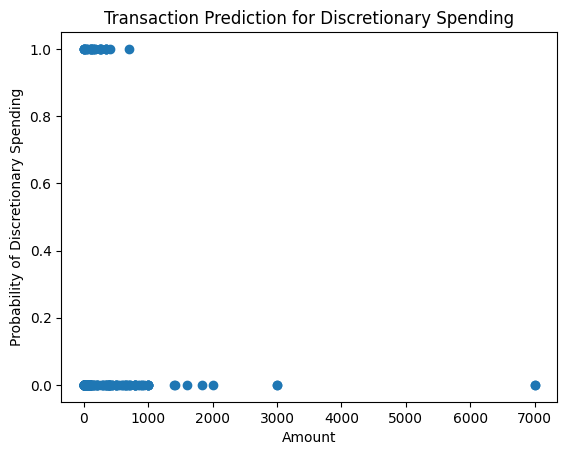

In [251]:
# Drawing Scatter plot for Discretionary Spending
plt.scatter(df.Amount_abs, df.DiscretionarySpending)
plt.xlabel("Amount")
plt.ylabel("Probability of Discretionary Spending")
plt.title("Transaction Prediction for Discretionary Spending")

In [252]:
# Fitting and initializing the logistical regression model for Discretionary Spending
x = df.Amount_abs
y3 = df.DiscretionarySpending
logreg = LogisticRegression(C=1.0, solver="lbfgs", multi_class="ovr")
X = x.values.reshape(-1, 1)
logreg.fit(X, y3)

i = 10

while i <= 200:
    print("Predictions for $", i, ":", logreg.predict([[i]]))
    i += 10

Predictions for $ 10 : [0]
Predictions for $ 20 : [0]
Predictions for $ 30 : [0]
Predictions for $ 40 : [0]
Predictions for $ 50 : [0]
Predictions for $ 60 : [0]
Predictions for $ 70 : [0]
Predictions for $ 80 : [0]
Predictions for $ 90 : [0]
Predictions for $ 100 : [0]
Predictions for $ 110 : [0]
Predictions for $ 120 : [0]
Predictions for $ 130 : [0]
Predictions for $ 140 : [0]
Predictions for $ 150 : [0]
Predictions for $ 160 : [0]
Predictions for $ 170 : [0]
Predictions for $ 180 : [0]
Predictions for $ 190 : [0]
Predictions for $ 200 : [0]


Text(0.5, 1.0, 'Transaction Prediction for Investment and Deposits')

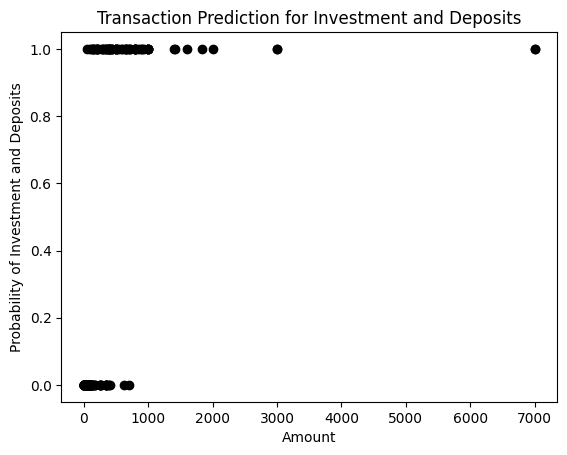

In [253]:
# Drawing Scatter plot for Investment and Deposits
plt.scatter(df.Amount_abs, df.InvestmentDeposit, color="Black")
plt.xlabel("Amount")
plt.ylabel("Probability of Investment and Deposits")
plt.title("Transaction Prediction for Investment and Deposits")

In [254]:
# Fitting and initializing the logistical regression model for Investment and Deposits
x = df.Amount_abs
y4 = df.InvestmentDeposit 
logreg = LogisticRegression(C=1.0, solver="lbfgs", multi_class="ovr")
X = x.values.reshape(-1, 1)
logreg.fit(X, y4)

i = 100

while i <= 5000:
    print("Predictions for $", i, ":", logreg.predict([[i]]))
    i += 100

Predictions for $ 100 : [0]
Predictions for $ 200 : [0]
Predictions for $ 300 : [0]
Predictions for $ 400 : [1]
Predictions for $ 500 : [1]
Predictions for $ 600 : [1]
Predictions for $ 700 : [1]
Predictions for $ 800 : [1]
Predictions for $ 900 : [1]
Predictions for $ 1000 : [1]
Predictions for $ 1100 : [1]
Predictions for $ 1200 : [1]
Predictions for $ 1300 : [1]
Predictions for $ 1400 : [1]
Predictions for $ 1500 : [1]
Predictions for $ 1600 : [1]
Predictions for $ 1700 : [1]
Predictions for $ 1800 : [1]
Predictions for $ 1900 : [1]
Predictions for $ 2000 : [1]
Predictions for $ 2100 : [1]
Predictions for $ 2200 : [1]
Predictions for $ 2300 : [1]
Predictions for $ 2400 : [1]
Predictions for $ 2500 : [1]
Predictions for $ 2600 : [1]
Predictions for $ 2700 : [1]
Predictions for $ 2800 : [1]
Predictions for $ 2900 : [1]
Predictions for $ 3000 : [1]
Predictions for $ 3100 : [1]
Predictions for $ 3200 : [1]
Predictions for $ 3300 : [1]
Predictions for $ 3400 : [1]
Predictions for $ 3500 